## Трифонов Никита Дмитриевич
### trifonov28rus@gmail.com
### tg: @qwertypine

## Тестовое задание «Отток клиентов»

__Описание__  
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.  
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.  
Источник данных: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling  


__Инструкция по выполнению задачи__  
1.	Загрузите и подготовьте данные  
2.	Исследуйте баланс классов, обучите модель без учета дисбаланса  
3.	Улучшите качество модели, учитывая дисбаланс классов  
4.	Проведите финальное тестирование  

Все преобразования и построение выполнять в Python. В результате предоставить Notebook с комментариями к выполняемым шагам и выводами о проделанной работе.  

Оптимальную модель для данной задачи выбирайте сами, сравнение нескольких подходов приветствуется. Любые дополнительные действия для улучшения качества модели также приветствуются.  

__Описание данных__  
_Признаки_  

    RowNumber – индекс строки в данных  
	CustomerId – уникальный идентификатор клиента  
	Surname – фамилия  
	CreditScore – кредитный скоринг  
	Geography – страна проживания  
	Gender – пол  
	Age – возраст  
	Tenure – количество недвижимости у клиента  
	Balance – баланс на счете  
    NumOfProducts – количество продуктов банка, используемых клиентом  
    HasCrCard – наличие кредитной карты  
    IsActiveMember – активность клиента  
    EstimatedSalary – предполагаемая зарплата  
_Целевой признак_   

	Exited – факт ухода клиента


## 1. Загрузите и подготовьте данные

## Разведочный анализ данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
features_pairplot = ['CreditScore',
                    'Geography',
                    'Gender',
                    'Age',
                    'Tenure',
                    'Balance',
                    'NumOfProducts',
                    'HasCrCard',
                    'IsActiveMember',
                    'EstimatedSalary',
                    'Exited']

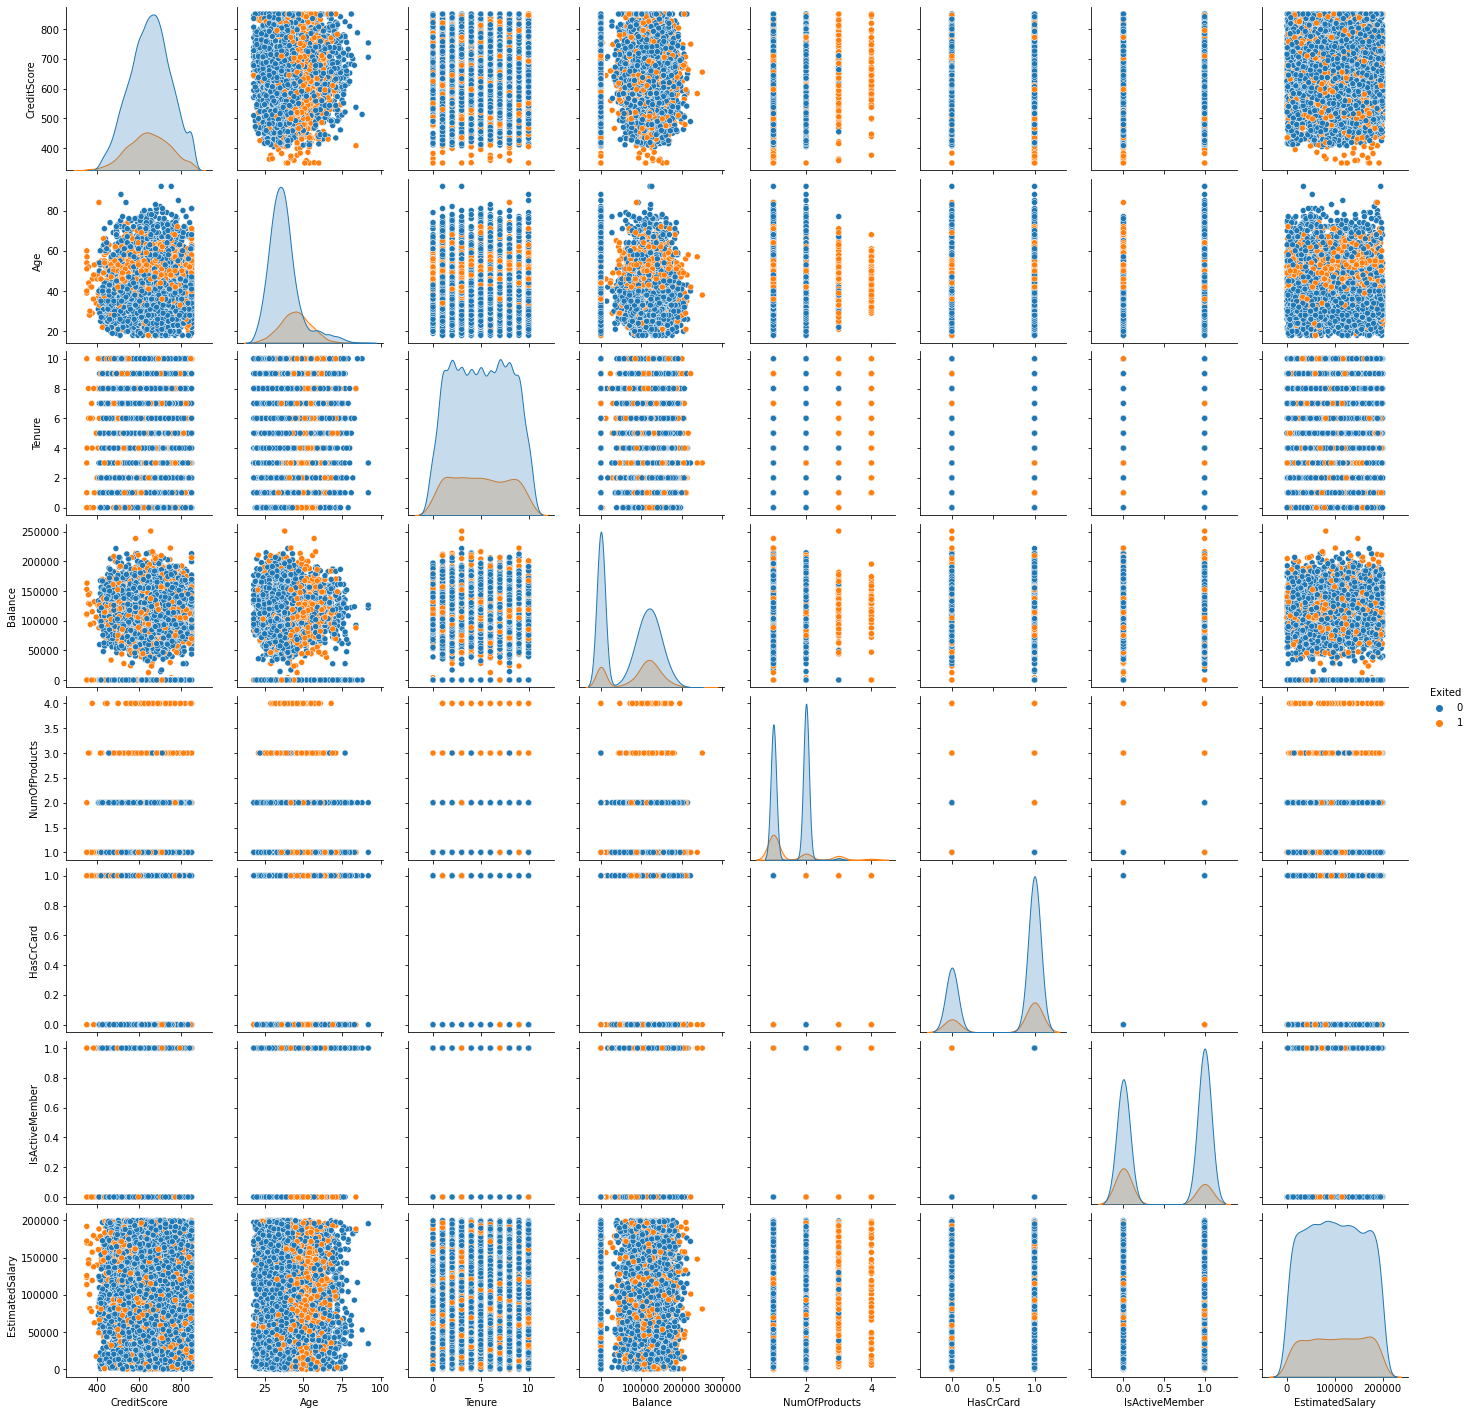

In [5]:
sns.pairplot(df[features_pairplot], hue='Exited')

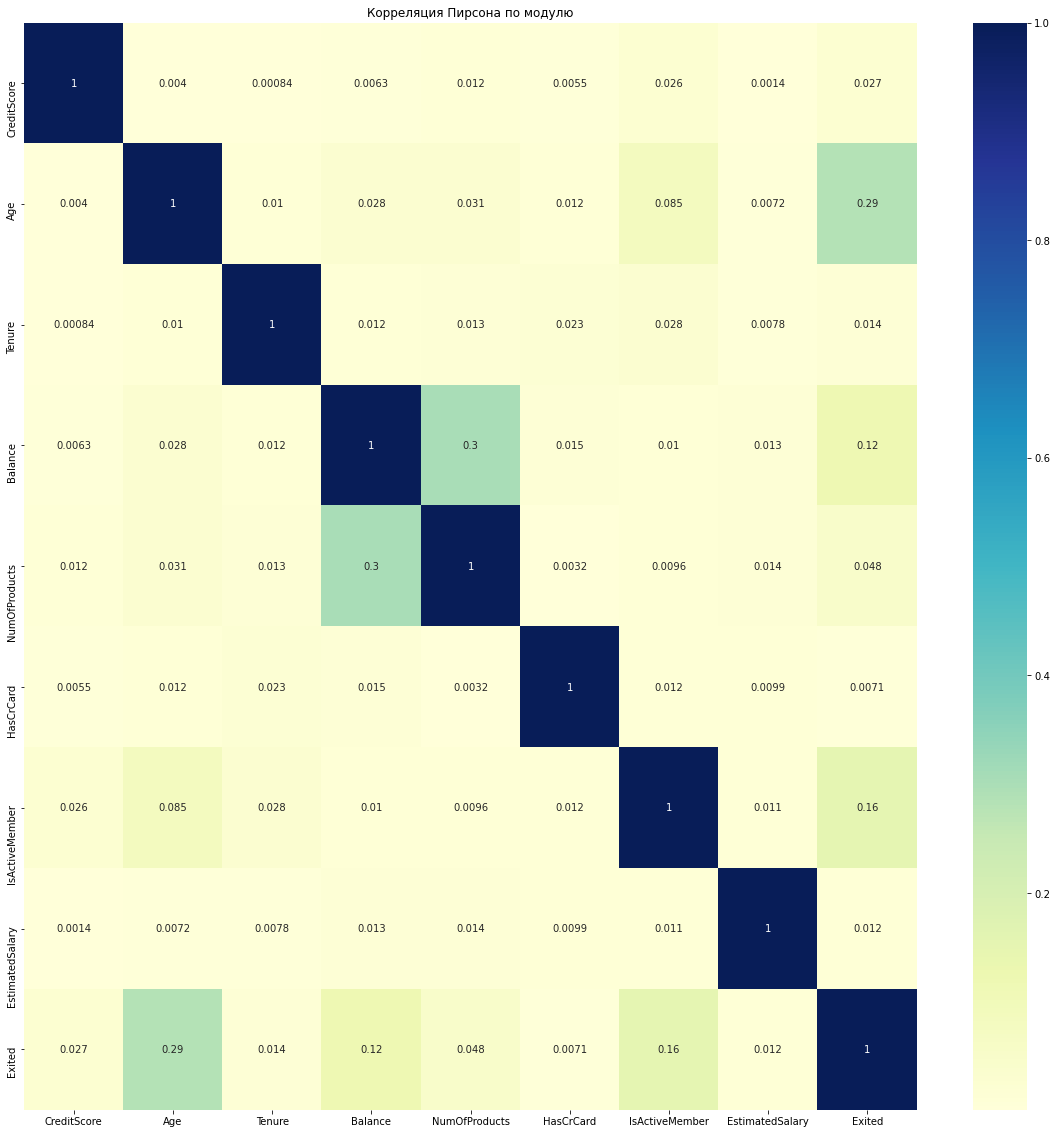

In [6]:
plt.figure(figsize=(20,20))
corrMatrix = df[features_pairplot].corr()
sns.heatmap(abs(corrMatrix), annot=True, cmap="YlGnBu")
plt.title('Корреляция Пирсона по модулю')
plt.show()

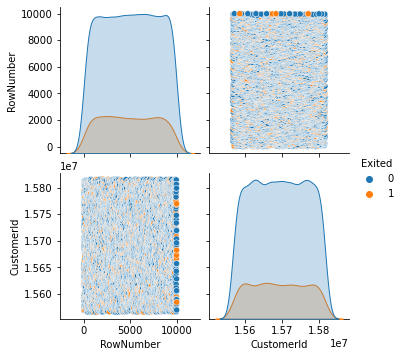

In [7]:
# проверим на возможные лики
sns.pairplot(df[['RowNumber','CustomerId','Surname', 'Exited']], hue='Exited')

In [8]:
df.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Целевая переменная')

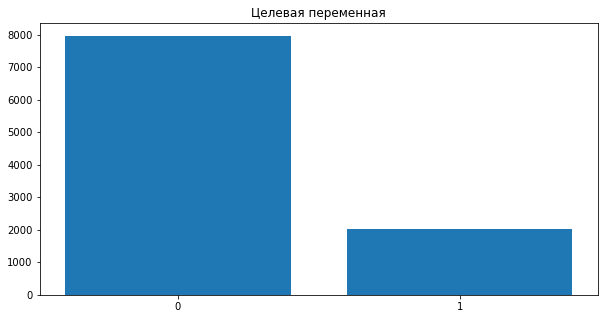

In [10]:
plt.figure(figsize=(10,5))
plt.bar([0, 1], [df.groupby('Exited').size()[0], df.groupby('Exited').size()[1]])
plt.xticks([0, 1])
plt.title('Целевая переменная')

Видим дисбаланс классов.

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


__Базовая проверка на выбросы:__    
* перцентили  - все ок
* дубликаты CustomerId  
* surname - проверить на число уникальных  

In [12]:
df[df.duplicated(keep=False, subset='CustomerId')] # дубликатов нет

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [13]:
df[df.duplicated(keep=False, subset='Surname')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Есть дубликаты, при необходимости возможно попытаться выделить семьи.

### Разобьем и подготовим данные

In [14]:
df.shape

(10000, 14)

In [15]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Поскольку в дальнейшем будут сравниваться также линейные модели, выполним MinMax нормировку вещественных признаков.  
Для чистоты стоит брать минимальные и максимальные значения на тренировочном наборе.

In [16]:
real_features = ['CreditScore',
                 'Age',
                 'Tenure', 
                 'Balance', 
                 'EstimatedSalary']

for f in real_features:
    df[f] = (df[f] - min(df[f])) / max(df[f])

In [17]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.316471,France,Female,0.260870,0.2,0.000000,1,1,1,0.506706,1
1,2,15647311,Hill,0.303529,Spain,Female,0.250000,0.1,0.334031,1,0,1,0.562676,0
2,3,15619304,Onio,0.178824,France,Female,0.260870,0.8,0.636357,3,1,0,0.569621,1
3,4,15701354,Boni,0.410588,France,Female,0.228261,0.1,0.000000,2,0,0,0.469093,0
4,5,15737888,Mitchell,0.588235,Spain,Female,0.271739,0.2,0.500246,1,1,1,0.395377,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
features = ['CreditScore',
            'Geography',
            'Gender',
            'Age',
            'Tenure',
            'Balance',
            'NumOfProducts',
            'HasCrCard',
            'IsActiveMember',
            'EstimatedSalary']

In [20]:
y = df['Exited'].values.copy() # Exited
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [21]:
X = df[features].values.copy()
X

array([[0.3164705882352941, 'France', 'Female', ..., 1, 1,
        0.50670555212876],
       [0.3035294117647059, 'Spain', 'Female', ..., 0, 1,
        0.562676156623489],
       [0.17882352941176471, 'France', 'Female', ..., 1, 0,
        0.5696213677634279],
       ...,
       [0.4223529411764706, 'France', 'Female', ..., 0, 1,
        0.21037791020942387],
       [0.4964705882352941, 'Germany', 'Male', ..., 1, 0,
        0.46440216152127317],
       [0.52, 'France', 'Female', ..., 1, 0, 0.19090317795949124]],
      dtype=object)

Поскольку исследование способов работы с категориальными признаками не является предметом данной задачи, воспользуемся готовым pipeline.

In [22]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [23]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [25]:
X = pipeline.fit_transform(X)
X

array([[-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.09598752, -0.57873591,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.09598752, -0.57873591, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 0.91241915,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

Существуют более продвинутые методы разбиения, но остановимся на "классическом" варианте.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 2. Исследуйте баланс классов, обучите модель без учета дисбаланса  
# 3. Улучшите качество модели, учитывая дисбаланс классов

Классические способы решения:  
* Undersampling (выкинуть часть объектов бОльшего класса)    
* Oversampling   
! Есть подводные камни

In [27]:
# проверим баланс классов
print(np.mean(y_train))
print(np.mean(y_test))

0.2080597014925373
0.19484848484848485


Отсюда следует что константный алгоритм может давать точность ~80%.

In [28]:
# есть библиотека imblearn, но с ней проблемы
# реализуем вречную


ind = np.where(y_train==1)[0]

X_train_os = X_train[ind]
y_train_os = y_train[ind].reshape(-1,1)

for i in range(2):
    X_train_os = np.vstack((X_train_os, X_train_os))
    y_train_os = np.vstack((y_train_os, y_train_os))

In [29]:
X_train_f = np.vstack((X_train, X_train_os))
y_train_f = np.vstack((y_train.reshape(-1,1), y_train_os))

In [30]:
# final - датасеты с оверсемплингом
from sklearn.utils import shuffle
X_train_f, y_train_f = shuffle(X_train_f, y_train_f, random_state=0)

In [31]:
y_train_f = y_train_f.reshape(-1,)

## Сравним модели

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import svm

In [35]:
models = []
models.append(LogisticRegression())
models.append(svm.SVC(probability=True))
models.append(RandomForestClassifier(n_estimators=165, max_depth=4, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth=4))
models.append(KNeighborsClassifier(n_neighbors=23))
models.append(GaussianNB())

### Оригинальные данные

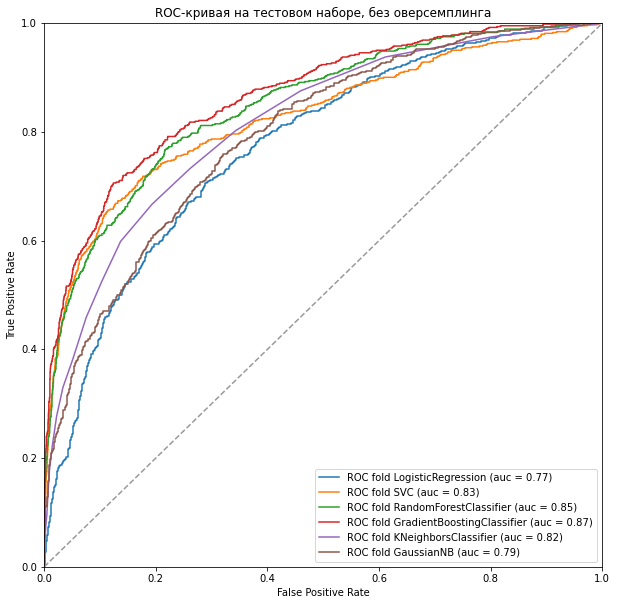

In [36]:
plt.figure(figsize=(10, 10)) 

roc_auc_orig = []
acc_orig = []
models_names = []

for model in models:
    model.fit(X_train, y_train)
    pred_scr = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_scr)
    roc_auc = auc(fpr, tpr)
    
    roc_auc_orig.append(round(roc_auc, 3))
    acc_orig.append(round(model.score(X_test, y_test), 3) * 100)
    
    md = str(model)
    md = md[:md.find('(')]
    models_names.append(md)
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая на тестовом наборе, без оверсемплинга')
plt.legend(loc="lower right")
plt.show()

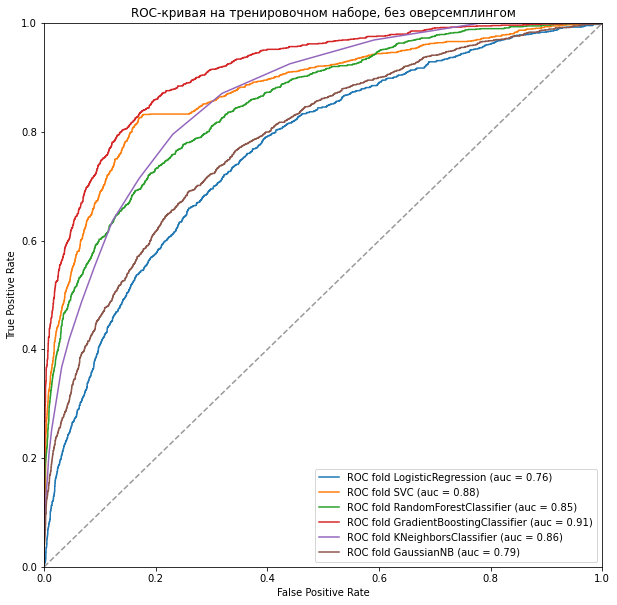

In [37]:
plt.figure(figsize=(10, 10)) 

for model in models:
    model.fit(X_train, y_train)
    pred_scr = model.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, pred_scr)
    roc_auc = auc(fpr, tpr)
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая на тренировочном наборе, без оверсемплингом')
plt.legend(loc="lower right")
plt.show()

### С оверсемплингом

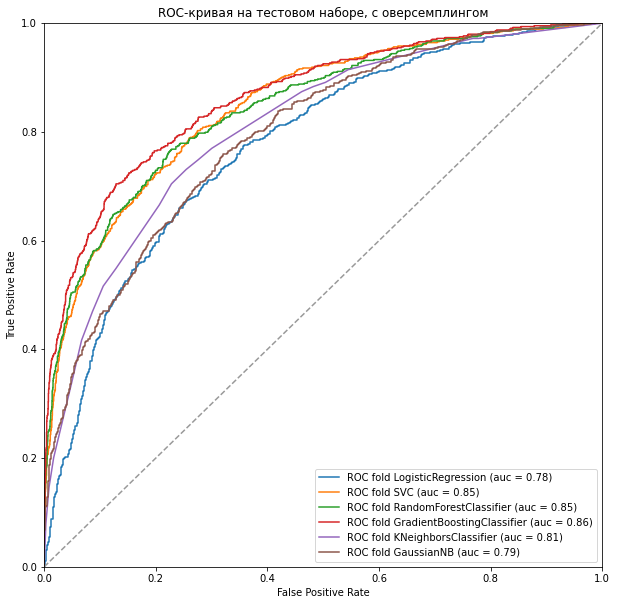

In [38]:
plt.figure(figsize=(10, 10)) 

roc_auc_os = []
acc_os = []

for model in models:
    model.fit(X_train_f, y_train_f)
    pred_scr = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_scr)
    roc_auc = auc(fpr, tpr)
    
    roc_auc_os.append(round(roc_auc, 3))
    acc_os.append(round(model.score(X_test, y_test), 3) * 100)
    
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая на тестовом наборе, с оверсемплингом')
plt.legend(loc="lower right")
plt.show()

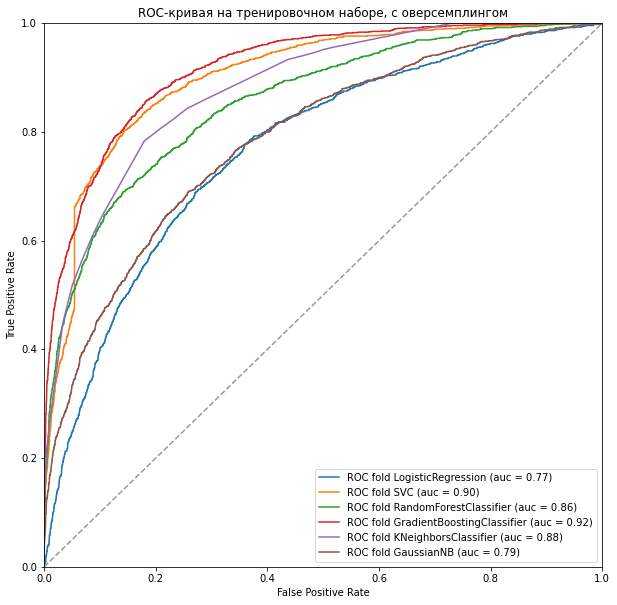

In [39]:
plt.figure(figsize=(10, 10)) 
for model in models:
    model.fit(X_train_f, y_train_f)
    pred_scr = model.predict_proba(X_train_f)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train_f, pred_scr)
    roc_auc = auc(fpr, tpr)
    md = str(model)
    md = md[:md.find('(')]
    plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая на тренировочном наборе, с оверсемплингом')
plt.legend(loc="lower right")
plt.show()

Видим переобучение у некоторых моделей, самое заметное в XGBoost.  
Это можно исправить, например, через гиперпараметр max_depth.    

Предметом данной работы не является перебор гиперпараметров, демонстрация навыков работы с GridSearchCV, байесовских методов и т.д.

In [40]:
res_acc = pd.DataFrame([acc_orig, acc_os])
res_acc.columns = models_names
res_acc.index = ['orig', 'oversampling']

In [41]:
print('accuracy')
res_acc

accuracy


,LogisticRegression,SVC,RandomForestClassifier,GradientBoostingClassifier,KNeighborsClassifier,GaussianNB
orig,81.2,86.2,84.5,87.2,84.1,83.2
oversampling,64.0,74.5,71.3,77.8,72.9,67.8


In [42]:
res_roc_auc = pd.DataFrame([roc_auc_orig, roc_auc_os])
res_roc_auc.columns = models_names
res_roc_auc.index = ['orig', 'oversampling']

In [43]:
print('roc_auc')
res_roc_auc

roc_auc


,LogisticRegression,SVC,RandomForestClassifier,GradientBoostingClassifier,KNeighborsClassifier,GaussianNB
orig,0.773,0.827,0.849,0.866,0.816,0.795
oversampling,0.776,0.848,0.845,0.864,0.809,0.795


## 4. Проведите финальное тестирование

Основные метрики в задаче классификации:  
* Accuracy  
* ROC-AUC  
* Recall
* Precision  
* Logloss  
* F1

Выбор метрики зависит от задачи.  
Помним, что у нас задача идет о прогнозировании оттока.

Зачастую в бизнес-задачах ошибка 1 и 2 рода имеют разное экономическое значение, поэтому также стоит рассмотреть полученные результаты с точки зрения матрицы ошибок.

Класс 1 или 0 может зависеть от выбранной нами отсечки по вероятности. Здесь рассмотрим 0.5.  
Порог выбирается из экономических соображений.  

In [44]:
from sklearn.metrics import confusion_matrix

LogisticRegression


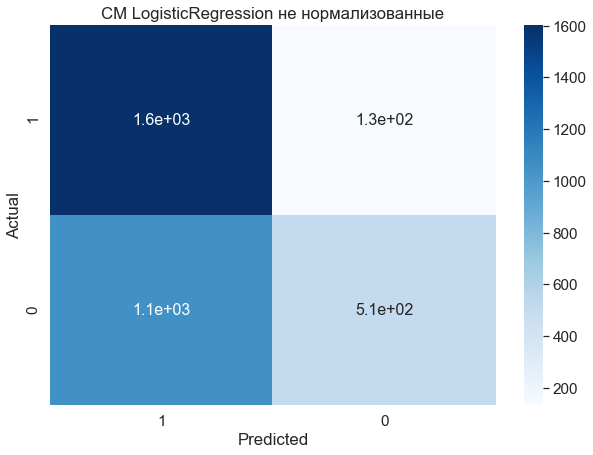

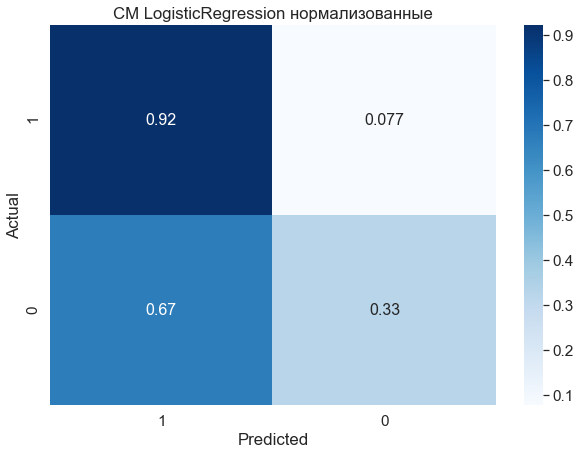

SVC


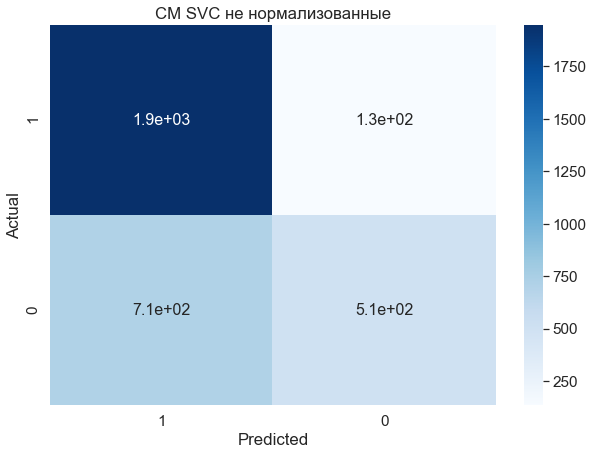

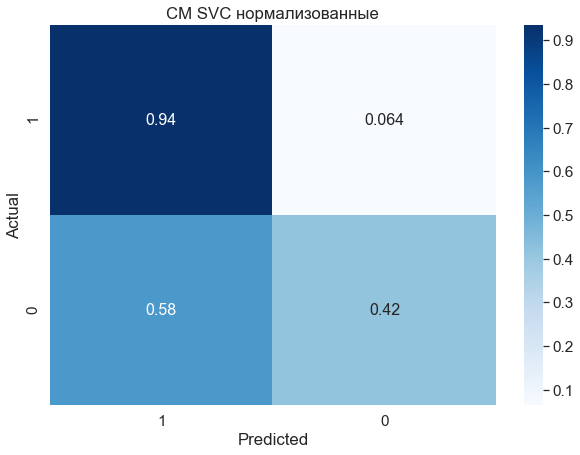

RandomForestClassifier


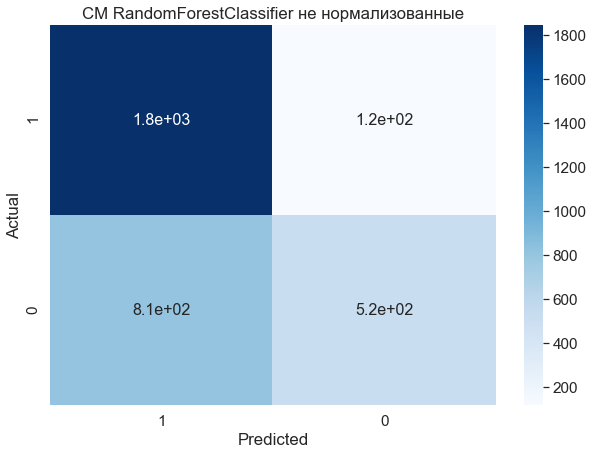

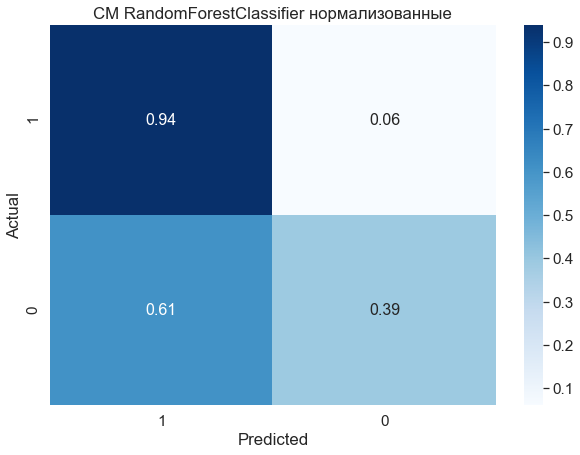

GradientBoostingClassifier


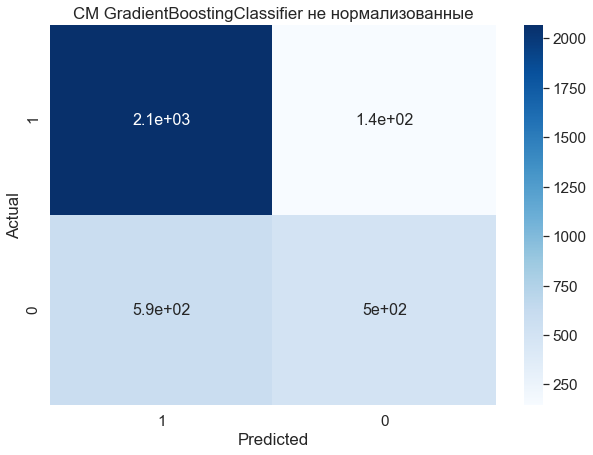

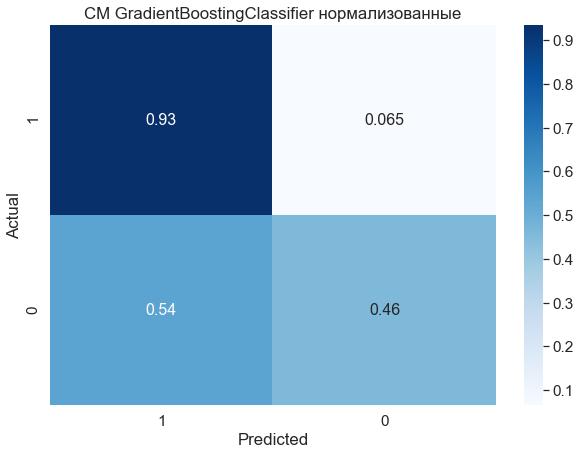

KNeighborsClassifier


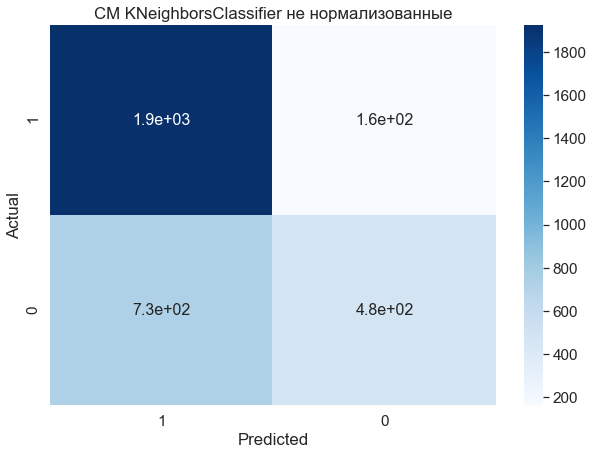

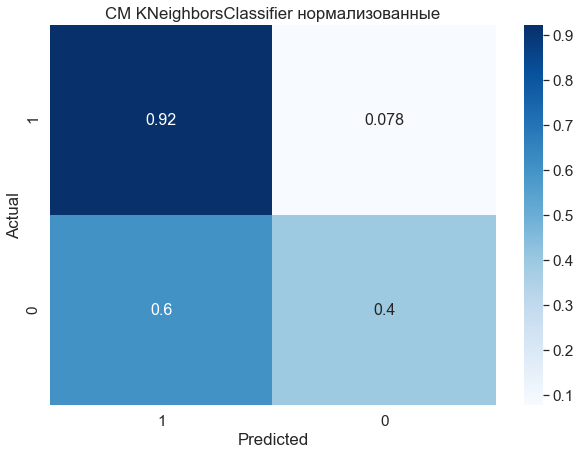

GaussianNB


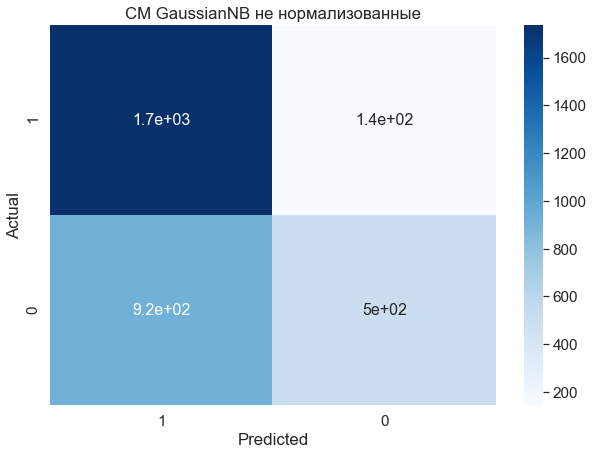

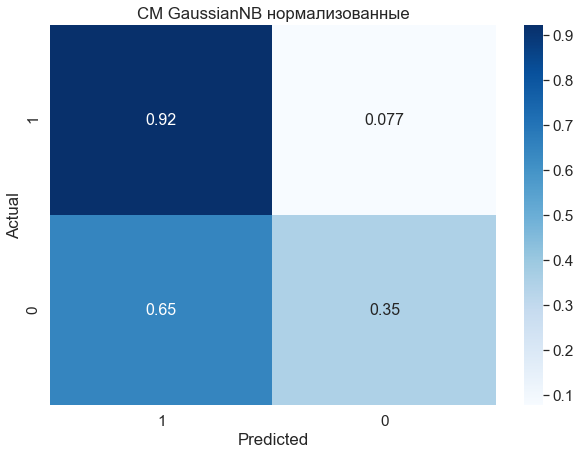

In [45]:
for model in models:
    
    md = str(model)
    md = md[:md.find('(')]
    
    print(md)
    
    z_ex_cm = pd.DataFrame(confusion_matrix(model.predict(X_test), y_test))
    df_cm = z_ex_cm.copy()
    df_cm.index = ["1", "0"]
    df_cm.columns = ["1", "0"]

    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}).set_title('CM '+md+' не нормализованные')




    z_ex_cm_norm = pd.DataFrame(confusion_matrix(model.predict(X_test), y_test, normalize='true'))
    df_cm_norm = z_ex_cm_norm.copy()
    df_cm_norm.index = ["1", "0"]
    df_cm_norm.columns = ["1", "0"]

    df_cm_norm.index.name = 'Actual'
    df_cm_norm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm_norm, cmap="Blues", annot=True,annot_kws={"size": 16}).set_title('CM '+md+' нормализованные')
    plt.show()
    
    print('========================================================================================')

Конкретный ответ зависит от типа воздействия, числа пользователей и конечной бизнес-метрики. Поэтому готового ответа на вопрос, какой алгоритм выбрать, нет.  

Подход к решению задачи:  
https://www.youtube.com/watch?v=Hma62JqoGtc&ab_channel=MLMeetup

# Вывод

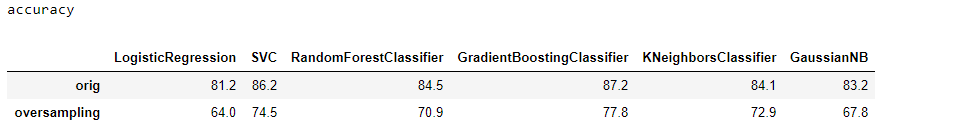

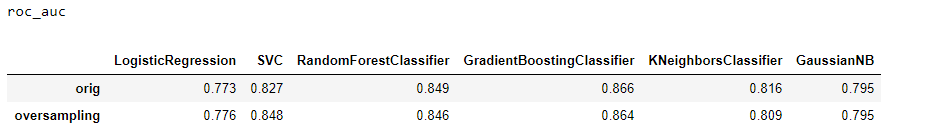

Мы предполагаем что доверительный интервал мал и модели можно сравнивать между собой.  
Хотя, для чистоты эксперимента его стоило построить.  

Из результатов следует 2 вещи:  
1) Метрика  accuracy является неподходящей для несбалансированной выборки  
2) LogisticRegression и SVM чувствительны к выборке с несбалансированными классами, [подробное объяснение здесь](https://habr.com/ru/post/349078/) и [здесь](https://issue.life/questions/48673545).  


Конечное сравнение алгоритмов зависит от бизнес-задачи.